<a href="https://colab.research.google.com/github/KhaingWah/PythonDataAnalysis/blob/main/ReadBicoin_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

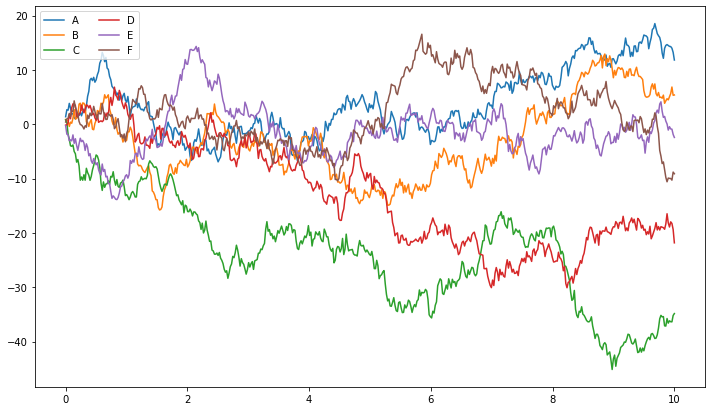

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [4]:
import requests
import pandas as pd

In [30]:
def get_historic_price(symbol, exchange, after):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [31]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-08-30 14:54:01.148429')

In [32]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [33]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [34]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-30 15:00:00,20268,20294,19713,19813,379.424199,7.595286e+06
2022-08-30 16:00:00,19825,19838,19663,19766,142.079729,2.805614e+06
2022-08-30 17:00:00,19761,19938,19552,19607,178.490976,3.514265e+06
2022-08-30 18:00:00,19623,19701,19577,19690,85.734142,1.684378e+06
2022-08-30 19:00:00,19696,19802,19685,19779,86.980543,1.717278e+06


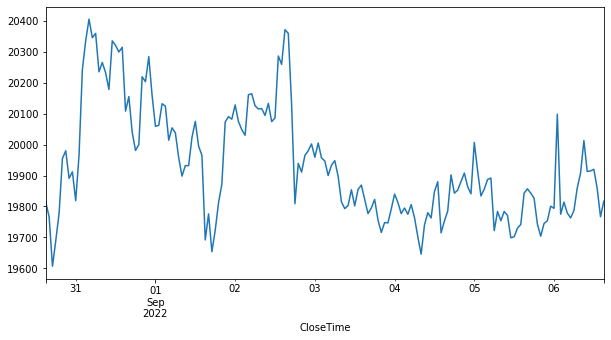

In [16]:
btc['ClosePrice'].plot(figsize=(10, 5))

In [17]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-30 15:00:00,1566.5,1571.7,1509.9,1521.1,2362.795257,3.618790e+06
2022-08-30 16:00:00,1523.2,1536.7,1513.3,1527.0,960.873912,1.459900e+06
2022-08-30 17:00:00,1525.1,1538.6,1484.3,1488.1,781.923567,1.180681e+06
2022-08-30 18:00:00,1486.7,1493.8,1472.2,1489.5,4530.750833,6.708999e+06
2022-08-30 19:00:00,1489.8,1510.0,1489.0,1506.6,2103.470724,3.146659e+06


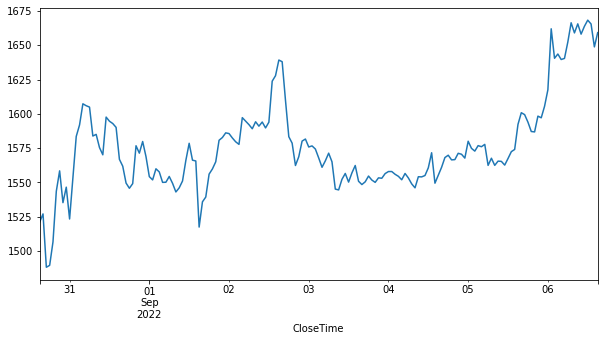

In [18]:
eth['ClosePrice'].plot(figsize=(10, 5))

In [19]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-30 15:00:00,1566.5,1571.7,1509.9,1521.1,2362.795257,3.618790e+06
2022-08-30 16:00:00,1523.2,1536.7,1513.3,1527.0,960.873912,1.459900e+06
2022-08-30 17:00:00,1525.1,1538.6,1484.3,1488.1,781.923567,1.180681e+06
2022-08-30 18:00:00,1486.7,1493.8,1472.2,1489.5,4530.750833,6.708999e+06
2022-08-30 19:00:00,1489.8,1510.0,1489.0,1506.6,2103.470724,3.146659e+06


In [20]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [21]:
output_notebook()

In [22]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [26]:
writer = pd.ExcelWriter('cryptos.xls')

In [27]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [28]:
eth.to_excel(writer, sheet_name='Ether')

In [29]:
writer.save()